# DS 2500
## Module Assignment 2 - Cleaning Data
For this assignment, I am using a dataset that quantifies and measures the different phoenitics of different words and languages. The website to the data can be found [here](http://www.phonetics.ucla.edu/voiceproject/voice.html). The most important aspect of the data is that it breaks down different acoustic measures of different recorded audio files which contain spoken words and vowels from several different languages. This dataset is a candidate for cleaning because of its shape. Namely, the data is spread wide and thin with multiple columns for time series data. This can be changed to be shorter and deeper, reducing the number of columns and making it easier to gain insights from the data. The name of the columns and some of the values of the columns of the data is also an issue. Renaming makes the data easier to work with mathematically

Read in the data

In [ ]:
import pandas as pd
df = pd.read_csv('Voice_Master.csv')

## Understanding the data
The dataset is complicated enough that it's worth it to do some inspection to understand exactly what's going on

Quick data insepection

In [2]:
df.head()

,Filename,0=do not use,Label,Language,Dialect/Village,Sex,Speaker #,Speaker,Lang_Spk,Phonation,...,sB4_mean,sB4_means001,sB4_means002,sB4_means003,sB4_means004,sB4_means005,sB4_means006,sB4_means007,sB4_means008,sB4_means009
0,F19May20_sure_normal.mat,0 end,r,English,NaN,F,19,F19,English_F19,M,...,263.529,217.219,272.275,230.260,215.393,178.683,158.294,209.815,348.863,542.583
1,F19May20_sure_normal.mat,0 end,r,English,NaN,F,19,F19,English_F19,M,...,375.086,354.539,448.949,254.102,159.089,220.819,198.345,227.356,592.842,908.053
2,F19May20_sure_normal.mat,0,r,English,NaN,F,19,F19,English_F19,M,...,295.344,407.098,357.500,242.458,224.664,200.499,192.645,229.259,363.865,434.302
3,F1July22_sure_normal.mat,0 end,r,English,NaN,F,1,F1,English_F1,M,...,277.880,131.692,410.788,366.203,183.711,213.710,246.977,328.101,265.039,357.186
4,F1July22_sure_normal.mat,0 end,r,English,NaN,F,1,F1,English_F1,M,...,335.320,209.534,376.419,357.762,191.279,250.888,322.978,439.648,573.923,291.340


In [3]:
df.shape

(16833, 474)

The first several columns give metadata about the word being spoken. There are hundreds of columns after that which contain several different acoustics measures. As an example, lets look at the f0 (fundamental frequency), and H1 (first harmonic). The documentation of the data set describes the prefix for columns names

In [21]:
f_prefixes = ['shrF0', 'strF0', 'sF0','pF0']
prefixes = f_prefixes

We can find all of the column names which contain these prefixes. There are hundreds of columns which contain just these two prefixes alone. What's important is to notice that each prefix has 10 values. means001, means002, ... means009, and mean. These are describing the mean of that acoustic measure at 9 different intervals throughout the recording. There is also a generic 'mean' column, which describes the mean across the different mean intervals.

In [22]:
columns = []
for c in list(df.columns):
    for p in prefixes:
        if p in c:
            columns.append(c)
columns

['shrF0_mean',
 'shrF0_means001',
 'shrF0_means002',
 'shrF0_means003',
 'shrF0_means004',
 'shrF0_means005',
 'shrF0_means006',
 'shrF0_means007',
 'shrF0_means008',
 'shrF0_means009',
 'strF0_mean',
 'strF0_means001',
 'strF0_means002',
 'strF0_means003',
 'strF0_means004',
 'strF0_means005',
 'strF0_means006',
 'strF0_means007',
 'strF0_means008',
 'strF0_means009',
 'sF0_mean',
 'sF0_means001',
 'sF0_means002',
 'sF0_means003',
 'sF0_means004',
 'sF0_means005',
 'sF0_means006',
 'sF0_means007',
 'sF0_means008',
 'sF0_means009',
 'pF0_mean',
 'pF0_means001',
 'pF0_means002',
 'pF0_means003',
 'pF0_means004',
 'pF0_means005',
 'pF0_means006',
 'pF0_means007',
 'pF0_means008',
 'pF0_means009']

There are several other metadata columns which are important to understand as well. Let's take a quick look at the head of the df again. For the first columns, all of the information is repeated for most of the columns. The most important column to notice is the "Filename" column, which encodes much of the information from many columns into one. It is specifying the language, speaker number, date, and word or vowel spoken. Given that the first 3 columns has a repeat filename, we can infer that each columns represents one sample from that file. 

In [6]:
df.head()

,Filename,0=do not use,Label,Language,Dialect/Village,Sex,Speaker #,Speaker,Lang_Spk,Phonation,...,sB4_mean,sB4_means001,sB4_means002,sB4_means003,sB4_means004,sB4_means005,sB4_means006,sB4_means007,sB4_means008,sB4_means009
0,F19May20_sure_normal.mat,0 end,r,English,NaN,F,19,F19,English_F19,M,...,263.529,217.219,272.275,230.260,215.393,178.683,158.294,209.815,348.863,542.583
1,F19May20_sure_normal.mat,0 end,r,English,NaN,F,19,F19,English_F19,M,...,375.086,354.539,448.949,254.102,159.089,220.819,198.345,227.356,592.842,908.053
2,F19May20_sure_normal.mat,0,r,English,NaN,F,19,F19,English_F19,M,...,295.344,407.098,357.500,242.458,224.664,200.499,192.645,229.259,363.865,434.302
3,F1July22_sure_normal.mat,0 end,r,English,NaN,F,1,F1,English_F1,M,...,277.880,131.692,410.788,366.203,183.711,213.710,246.977,328.101,265.039,357.186
4,F1July22_sure_normal.mat,0 end,r,English,NaN,F,1,F1,English_F1,M,...,335.320,209.534,376.419,357.762,191.279,250.888,322.978,439.648,573.923,291.340


The actual audio files are provided on the website for the data. Let's play the file 'F19May20_sure_normal.mat'. There word "sure" is repeated 3 distinct times. The 3 repeats in the rows correspond with each pronounciation of the word

In [7]:
import IPython
IPython.display.Audio("F19May20_sure_normal.wav")

The documentation for the data describes 3 columns the encode this information; 'Duration', 'seg_Start', and 'seg_End'

In [8]:
df_f = df[['Filename', 'Duration', 'seg_Start', 'seg_End']]
df_f.head()

,Filename,Duration,seg_Start,seg_End
0,F19May20_sure_normal.mat,370.338,2328.799,2699.137
1,F19May20_sure_normal.mat,297.392,3293.921,3591.313
2,F19May20_sure_normal.mat,297.392,4208.542,4505.934
3,F1July22_sure_normal.mat,285.244,2331.887,2617.131
4,F1July22_sure_normal.mat,268.161,4685.202,4953.363


## Cleaning Data

Instead of having multiple columns describing the time series of the different acoustic measures for each interval, it would make more sense to have one column for each corresponding series (one for mean, one for means001 etc), and another column that represents which acoustic measure it's describing. This will increase the number of rows (one for each acoustic measure), but makes it easier to obtain each measure. We should be able to specify for which acoustic variables we want to reshape the data. For now, I'll show all of them.

In [10]:
acoustic_cols = [c for c in list(df.columns) if 'mean' in c]
acoustic_cols

['H1c_mean',
 'H1c_means001',
 'H1c_means002',
 'H1c_means003',
 'H1c_means004',
 'H1c_means005',
 'H1c_means006',
 'H1c_means007',
 'H1c_means008',
 'H1c_means009',
 'H2c_mean',
 'H2c_means001',
 'H2c_means002',
 'H2c_means003',
 'H2c_means004',
 'H2c_means005',
 'H2c_means006',
 'H2c_means007',
 'H2c_means008',
 'H2c_means009',
 'H4c_mean',
 'H4c_means001',
 'H4c_means002',
 'H4c_means003',
 'H4c_means004',
 'H4c_means005',
 'H4c_means006',
 'H4c_means007',
 'H4c_means008',
 'H4c_means009',
 'A1c_mean',
 'A1c_means001',
 'A1c_means002',
 'A1c_means003',
 'A1c_means004',
 'A1c_means005',
 'A1c_means006',
 'A1c_means007',
 'A1c_means008',
 'A1c_means009',
 'A2c_mean',
 'A2c_means001',
 'A2c_means002',
 'A2c_means003',
 'A2c_means004',
 'A2c_means005',
 'A2c_means006',
 'A2c_means007',
 'A2c_means008',
 'A2c_means009',
 'A3c_mean',
 'A3c_means001',
 'A3c_means002',
 'A3c_means003',
 'A3c_means004',
 'A3c_means005',
 'A3c_means006',
 'A3c_means007',
 'A3c_means008',
 'A3c_means009',
 'H1

To reshape the data, we'll define the function reshape_df which takes in a dataframe in the original data format and returns a dataframe that has the columns; 'acoustic', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'mean'. Each number corresponds with the 'means00i' in the original data. The acoustic column specifies which acoustic variable the sample represents. The function will also take in the acoustic columns for which we wish to reshape. 

In [11]:
import re

def reshape_df(df, acoustic_cols):
    melted_dfs = []
    
    # loop from 1 to 9 to get all of the columns at specified mean
    for i in range(1,10):
        columns = list(df.columns)
        melt_vars = [k for k in acoustic_cols if f'means00{i}' in k]
        id_vars = [l for l in columns if l not in melt_vars]
        
        # melt the columns at the ith mean
        group_melt = pd.melt(df, id_vars=id_vars, var_name="acoustic", value_name=f'{i}')
        
        # extract out only the relevant part of the column name
        group_melt['acoustic'] = group_melt['acoustic'].str.extract(r'([a-zA-Z0-9]*)_')
        
        # add to the list of all current melts. 
        melted_dfs.append(group_melt)
    
    # care take of 'mean' column
    # mean re pattern
    pattern = r'[a-zA-Z0-9]*_mean'
    melt_vars = [k for k in acoustic_cols if re.match(pattern, k)]
    id_vars = [l for l in columns if l not in melt_vars]
    group_melt = pd.melt(df, id_vars=id_vars, var_name="acoustic", value_name=f'mean')
    group_melt['acoustic'] = group_melt['acoustic'].str.extract(r'([a-zA-Z0-9]*)_')
    melted_dfs.append(group_melt)
        
    # we want to add each of ith columns from all data frames into one dataframe
    reshaped_df = melted_dfs[0]
    for i in range(1,9):
        reshaped_df[f'{i+1}'] = melted_dfs[i][f'{i+1}']
        
    reshaped_df[f'mean'] = melted_dfs[len(melted_dfs) -1][f'mean']
    
    # Drop the columns from the first melted dataframe that were used to generate 
    # the other dataframes. 
    cols_to_drop = [i for i in list(reshaped_df.columns) if 'mean' in i]
    cols_to_drop.remove('mean')
    return reshaped_df.drop(columns=cols_to_drop)

I'm going to redefine the acoustic_cols to contain only a subset of the acoustic variables. Reshaping with every acoustic variable is extremely computationally expensive and takes a long time to finish. I'll use the sample columns that we calculated at the beginning. It will still take a significant amount of time to run. 

In [12]:
acoustic_cols = columns
print(acoustic_cols)

['shrF0_mean', 'shrF0_means001', 'shrF0_means002', 'shrF0_means003', 'shrF0_means004', 'shrF0_means005', 'shrF0_means006', 'shrF0_means007', 'shrF0_means008', 'shrF0_means009', 'strF0_mean', 'strF0_means001', 'strF0_means002', 'strF0_means003', 'strF0_means004', 'strF0_means005', 'strF0_means006', 'strF0_means007', 'strF0_means008', 'strF0_means009']


In [13]:
reshaped_df = reshape_df(df, acoustic_cols)
reshaped_df

,Filename,0=do not use,Label,Language,Dialect/Village,Sex,Speaker #,Speaker,Lang_Spk,Phonation,...,1,2,3,4,5,6,7,8,9,mean
0,F19May20_sure_normal.mat,0 end,r,English,NaN,F,19,F19,English_F19,M,...,261.805,253.54,245.933,229.985,216.3,206.111,195.15,205.68,209.894,224.944
1,F19May20_sure_normal.mat,0 end,r,English,NaN,F,19,F19,English_F19,M,...,245.889,230.159,225.345,219.922,215.054,206.275,205.521,218.666,230.357,221.957
2,F19May20_sure_normal.mat,0,r,English,NaN,F,19,F19,English_F19,M,...,244.402,220.292,212.002,206.283,204.379,202.506,211.463,206.619,195.49,211.507
3,F1July22_sure_normal.mat,0 end,r,English,NaN,F,1,F1,English_F1,M,...,338.72,344.274,344.57,319.262,262.049,201.77,167.701,167.822,164.359,256.685
4,F1July22_sure_normal.mat,0 end,r,English,NaN,F,1,F1,English_F1,M,...,330.564,347.955,358.345,342.45,294.441,212.475,168.601,166.258,167.45,265.479
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33661,zhangyuanlin_95.mat,NaN,tcjiu_11,Miao,Black,M,9,M9,Miao_M9,C,...,157.132,132.149,121.536,129.201,144.889,150.983,150.517,140.124,150.258,158.847
33662,zhangyuanlin_96.mat,NaN,ji_11,Miao,Black,M,9,M9,Miao_M9,C,...,150.596,142.851,150.452,149.547,136.492,142.483,158.543,164.499,150.529,NaN
33663,zhangyuanlin_96.mat,NaN,ji_11,Miao,Black,M,9,M9,Miao_M9,C,...,160.612,152.171,155.55,165.067,168.502,159.169,141.553,123.589,111.81,NaN
33664,zhangyuanlin_97.mat,NaN,ji_11,Miao,Black,M,9,M9,Miao_M9,C,...,148.852,150.236,157.383,161.913,154.833,143.447,125.755,120.256,131.405,NaN


We can look at the column to verify they are all there

In [14]:
reshaped_df.columns

Index(['Filename', '0=do not use', 'Label', 'Language', 'Dialect/Village',
       'Sex', 'Speaker #', 'Speaker', 'Lang_Spk', 'Phonation', 'Lphon',
       'Vowel', 'Oral/Nasal', 'Tone From txtgrid', 'Tone Cont', 'Tone',
       'No.Tone', 'Tphon', 'CorV', 'Pre_C', 'Aspiration', 'Duration',
       'seg_Start', 'seg_End', 'acoustic', '1', '2', '3', '4', '5', '6', '7',
       '8', '9', 'mean'],
      dtype='object')

Doing some basic column filtering gives us a better view of what the reshaping looks like

In [16]:
reshaped_f_df = reshaped_df[['Filename', 'acoustic', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'mean']]
reshaped_f_df

,Filename,acoustic,1,2,3,4,5,6,7,8,9,mean
0,F19May20_sure_normal.mat,shrF0,261.805,253.54,245.933,229.985,216.3,206.111,195.15,205.68,209.894,224.944
1,F19May20_sure_normal.mat,shrF0,245.889,230.159,225.345,219.922,215.054,206.275,205.521,218.666,230.357,221.957
2,F19May20_sure_normal.mat,shrF0,244.402,220.292,212.002,206.283,204.379,202.506,211.463,206.619,195.49,211.507
3,F1July22_sure_normal.mat,shrF0,338.72,344.274,344.57,319.262,262.049,201.77,167.701,167.822,164.359,256.685
4,F1July22_sure_normal.mat,shrF0,330.564,347.955,358.345,342.45,294.441,212.475,168.601,166.258,167.45,265.479
...,...,...,...,...,...,...,...,...,...,...,...,...
33661,zhangyuanlin_95.mat,strF0,157.132,132.149,121.536,129.201,144.889,150.983,150.517,140.124,150.258,158.847
33662,zhangyuanlin_96.mat,strF0,150.596,142.851,150.452,149.547,136.492,142.483,158.543,164.499,150.529,NaN
33663,zhangyuanlin_96.mat,strF0,160.612,152.171,155.55,165.067,168.502,159.169,141.553,123.589,111.81,NaN
33664,zhangyuanlin_97.mat,strF0,148.852,150.236,157.383,161.913,154.833,143.447,125.755,120.256,131.405,NaN


### Additional Reshaping
The reshaping we've done so far makes it much easier to access individual parts of the dataset. We can do additional reshaping and pivoting to come up with different aggregations and groupings. I'm particularly interested in reshaping the data for graphing so that it's easy to visualize the differences and trends in the acoustics. The following function will produce a plot friendly data frame for a single sample from one audio file. The sample is specified by the filename and its segment start

In [17]:
def reshape_plot(df, filename, seg_Start):
    # uniquely identify a sample by it's filename and duration
    groups = df.groupby(['Filename', 'seg_Start'])
    
    # find the right group
    group = groups.get_group((filename, seg_Start))
    
    # melt again, this time putting the interval numbers as rows instead of columns
    melt_vars = [f'{i}' for i in range(1,10)]
    id_vars = [c for c in list(reshaped_df.columns) if c not in melt_vars]
    melt = pd.melt(group, id_vars=id_vars)
    
    # pivot to create each acoustic as a separate set. 
    # this makes plotting multiple sets as the same item much easier
    pivot = pd.pivot(melt, index='variable', columns='acoustic',values='value')
    return pivot

As a simple test, we'll use the funtion with the first sample, and plot the values. We will see this again in our EDA visualization

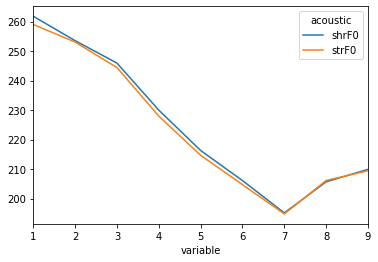

In [20]:
import matplotlib as plt
%matplotlib inline

filename = 'F19May20_sure_normal.mat'
start = 2328.799

plot_df1 = reshape_plot(reshaped_df, filename, start)
plot_df1.plot()

There are quite a few more transformations we could perform on the shape of the data depending on the information we would like to extract. The first transformation we did covers most of the heavy lifting however, so we will use that as the base for our EDA

# Exploratory Data Analysis

## Read in Data
We'll load in the data again. This time I'm only concerned about a few of the acoustic measures, so I'll use my reshaping function with just a few values

In [23]:
df = pd.read_csv('Voice_Master.csv')

/Users/richardtimpson/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (1,4,6,13,204,205,206,207,208,209,210,211,212,213) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [24]:
i_columns = [f'{i}' for i in range(1,10)]

In [25]:
f_prefixes = ['shrF0', 'strF0', 'sF0','pF0']
# f_prefixes = ['shrF0']
acoustic_cols = []
for c in list(df.columns):
    for p in f_prefixes:
        if p in c:
            acoustic_cols.append(c)
reshaped_df = reshape_df(df, acoustic_cols)

## Check the packaging
As we can see, reshaping the data creates thousands more columns

In [26]:
reshaped_df.shape

(67332, 35)

## Look at top and bottom of data

In [27]:
reshaped_df.head()

,Filename,0=do not use,Label,Language,Dialect/Village,Sex,Speaker #,Speaker,Lang_Spk,Phonation,...,1,2,3,4,5,6,7,8,9,mean
0,F19May20_sure_normal.mat,0 end,r,English,NaN,F,19,F19,English_F19,M,...,261.805,253.54,245.933,229.985,216.3,206.111,195.15,205.68,209.894,224.944
1,F19May20_sure_normal.mat,0 end,r,English,NaN,F,19,F19,English_F19,M,...,245.889,230.159,225.345,219.922,215.054,206.275,205.521,218.666,230.357,221.957
2,F19May20_sure_normal.mat,0,r,English,NaN,F,19,F19,English_F19,M,...,244.402,220.292,212.002,206.283,204.379,202.506,211.463,206.619,195.49,211.507
3,F1July22_sure_normal.mat,0 end,r,English,NaN,F,1,F1,English_F1,M,...,338.72,344.274,344.57,319.262,262.049,201.77,167.701,167.822,164.359,256.685
4,F1July22_sure_normal.mat,0 end,r,English,NaN,F,1,F1,English_F1,M,...,330.564,347.955,358.345,342.45,294.441,212.475,168.601,166.258,167.45,265.479


In [30]:
reshaped_df.tail()

,Filename,0=do not use,Label,Language,Dialect/Village,Sex,Speaker #,Speaker,Lang_Spk,Phonation,...,1,2,3,4,5,6,7,8,9,mean
67327,zhangyuanlin_95.mat,NaN,tcjiu_11,Miao,Black,M,9,M9,Miao_M9,C,...,0,0,0,0,0,0,0,0,0,NaN
67328,zhangyuanlin_96.mat,NaN,ji_11,Miao,Black,M,9,M9,Miao_M9,C,...,0,0,0,0,0,0,0,0,0,NaN
67329,zhangyuanlin_96.mat,NaN,ji_11,Miao,Black,M,9,M9,Miao_M9,C,...,0,0,0,0,0,0,0,0,0,NaN
67330,zhangyuanlin_97.mat,NaN,ji_11,Miao,Black,M,9,M9,Miao_M9,C,...,0,0,0,0,0,0,0,0,0,NaN
67331,zhangyuanlin_97.mat,NaN,ji_11,Miao,Black,M,9,M9,Miao_M9,C,...,0,0,0,0,0,0,0,0,0,NaN


It may seem odd that all of the values are 0 for the tail. Upon further investigation, we can see that the values are only reporting for the pF0 acoustic

In [31]:
tail = reshaped_df.tail()
tail = tail[[f'{i}' for i in range (1,10)] + ['mean', 'Filename', 'Duration', 'acoustic']]
tail

,1,2,3,4,5,6,7,8,9,mean,Filename,Duration,acoustic
67327,0,0,0,0,0,0,0,0,0,NaN,zhangyuanlin_95.mat,486.793,pF0
67328,0,0,0,0,0,0,0,0,0,NaN,zhangyuanlin_96.mat,620.641,pF0
67329,0,0,0,0,0,0,0,0,0,NaN,zhangyuanlin_96.mat,524.748,pF0
67330,0,0,0,0,0,0,0,0,0,NaN,zhangyuanlin_97.mat,571.323,pF0
67331,0,0,0,0,0,0,0,0,0,NaN,zhangyuanlin_97.mat,462.609,pF0


We can check these columns in the original data frame to verify that no data is getting lost in our reshaping

In [32]:
columns = [c for c in list(df.columns) if 'pF0' in c]
tail = df.tail()
tail = tail[columns]
tail

,pF0_mean,pF0_means001,pF0_means002,pF0_means003,pF0_means004,pF0_means005,pF0_means006,pF0_means007,pF0_means008,pF0_means009
16828,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16829,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16830,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16831,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16832,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Check the 'n's
Because we reshaped with only the f_prefixes, we can check the unique values for the acoustic column to make sure that there is nothing else

In [33]:
reshaped_df['acoustic'].unique()

array(['shrF0', 'strF0', 'sF0', 'pF0'], dtype=object)

We can also verify that all of the interval columns have the same number of non-null values

In [34]:
isnull = reshaped_df.isnull().sum().sort_values(ascending=False)
isnull[[f'{i}' for i in range(1,10)] + ['mean']]

1       1609
2       1561
3       1484
4       1476
5       1484
6       1436
7       1493
8       1542
9       1630
mean    6043
dtype: int64

## Validate against external data source

I would have thought that these values would be the same for each interval. I would like to verify that there are in fact some intervals without values where others do have values. I'll get all the rows where column 2 is null, and check the entire row to see what the values report. I'll also verify this agains the original data before the reshaping

In [35]:
filtered_df = reshaped_df[reshaped_df['2'].isna()]
filtered_df.head()

,Filename,0=do not use,Label,Language,Dialect/Village,Sex,Speaker #,Speaker,Lang_Spk,Phonation,...,1,2,3,4,5,6,7,8,9,mean
4982,2008-11-19-1300-35_Audio.mat,NaN,E=,Gujarati,NaN,M,1,M1,Gujarati_M1,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5642,2008-11-21-1430-23_Audio.mat,NaN,a=,Gujarati,NaN,M,3,M3,Gujarati_M3,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5645,2008-11-21-1430-24_Audio.mat,NaN,v,Gujarati,NaN,M,3,M3,Gujarati_M3,M,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5649,2008-11-21-1430-25_Audio.mat,NaN,v=,Gujarati,NaN,M,3,M3,Gujarati_M3,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5652,2008-11-21-1430-26_Audio.mat,NaN,v,Gujarati,NaN,M,3,M3,Gujarati_M3,M,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Need to look at the acoustic type

In [36]:
filtered_a_df = filtered_df[[f'{i}' for i in range(1,10)] + ['mean', 'Filename', 'acoustic', 'Duration']]
filtered_a_df.head()

,1,2,3,4,5,6,7,8,9,mean,Filename,acoustic,Duration
4982,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-11-19-1300-35_Audio.mat,shrF0,167.973
5642,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-11-21-1430-23_Audio.mat,shrF0,181.092
5645,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-11-21-1430-24_Audio.mat,shrF0,132.807
5649,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-11-21-1430-25_Audio.mat,shrF0,167.676
5652,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008-11-21-1430-26_Audio.mat,shrF0,69.358


Taking the values for one of the rows to check against original data

In [37]:
filename = '2008-11-21-1430-23_Audio.mat'
duration = 181.092

This verifies that the original data also has missing values for pF0 and shrF0

In [38]:
verify_df = df.loc[(df['Filename'] == filename) & (df['Duration'] == duration)]
verify_df = verify_df[[c for c in list(df.columns) if 'pF0' in c or 'shrF0' in c]]
verify_df
# verify_df = df.loc[df['Duration'] == duration]
# verify_df

,shrF0_mean,shrF0_means001,shrF0_means002,shrF0_means003,shrF0_means004,shrF0_means005,shrF0_means006,shrF0_means007,shrF0_means008,shrF0_means009,pF0_mean,pF0_means001,pF0_means002,pF0_means003,pF0_means004,pF0_means005,pF0_means006,pF0_means007,pF0_means008,pF0_means009
5642,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Another validation which I've already done somewhat was to check the number of rows in the original data against the audio file that has the recordings of the spoken word. For the specifc file that I checked, there were 3 pronounciations of the word 'sure', and 3 rows in the data for each pronounciation

## Visualization
The reshaping function for plotting that I wrote in the data cleaning section comes in handy here. I am interested in the prefixes already specified because (according to the data documentation), they are supposed to be measuring the same acoustic variable in the audio - the [fundamental frequency](https://en.wikipedia.org/wiki/Fundamental_frequency). There are 4 different algorithms used to produce the values, hence there are 4 reported fundamental frequency acoustic measures. I would like to see the difference in the mean between each of the values for several different samples. To keep things simple, we'll limit ourselves to the english spoken words

Limit to english speaking

In [39]:
english_r_df = reshaped_df[reshaped_df['Language'] == 'English']
list(english_r_df.columns)

['Filename',
 '0=do not use',
 'Label',
 'Language',
 'Dialect/Village',
 'Sex',
 'Speaker #',
 'Speaker',
 'Lang_Spk',
 'Phonation',
 'Lphon',
 'Vowel',
 'Oral/Nasal',
 'Tone From txtgrid',
 'Tone Cont',
 'Tone',
 'No.Tone',
 'Tphon',
 'CorV',
 'Pre_C',
 'Aspiration',
 'Duration',
 'seg_Start',
 'seg_End',
 'acoustic',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 'mean']

Group by name to get all of the samples for each file

In [40]:
groups = english_r_df.groupby('Filename')
groups.groups

{'F19May20_sure_normal.mat': Int64Index([0, 1, 2, 16833, 16834, 16835, 33666, 33667, 33668, 50499, 50500,
             50501],
            dtype='int64'),
 'F1July22_sure_normal.mat': Int64Index([3, 4, 5, 16836, 16837, 16838, 33669, 33670, 33671, 50502, 50503,
             50504],
            dtype='int64'),
 'F21March4_sure_normal.mat': Int64Index([6, 7, 8, 16839, 16840, 16841, 33672, 33673, 33674, 50505, 50506,
             50507],
            dtype='int64'),
 'F21May12_sure_normal.mat': Int64Index([9, 10, 11, 16842, 16843, 16844, 33675, 33676, 33677, 50508, 50509,
             50510],
            dtype='int64'),
 'F22April15_sure_normal.mat': Int64Index([12, 13, 14, 16845, 16846, 16847, 33678, 33679, 33680, 50511, 50512,
             50513],
            dtype='int64'),
 'F22July11_sure_normal.mat': Int64Index([15, 16, 17, 16848, 16849, 16850, 33681, 33682, 33683, 50514, 50515,
             50516],
            dtype='int64'),
 'F25August19_sure_normal.mat': Int64Index([18, 19, 20, 16

Get a few of the groups to use later

In [41]:
group1 = groups.get_group('F19May20_sure_normal.mat')
group1 = group1[['Filename', 'Duration', 'acoustic','seg_Start', 'mean'] + i_columns]
group1.head()

,Filename,Duration,acoustic,seg_Start,mean,1,2,3,4,5,6,7,8,9
0,F19May20_sure_normal.mat,370.338,shrF0,2328.799,224.944,261.805,253.54,245.933,229.985,216.3,206.111,195.15,205.68,209.894
1,F19May20_sure_normal.mat,297.392,shrF0,3293.921,221.957,245.889,230.159,225.345,219.922,215.054,206.275,205.521,218.666,230.357
2,F19May20_sure_normal.mat,297.392,shrF0,4208.542,211.507,244.402,220.292,212.002,206.283,204.379,202.506,211.463,206.619,195.49
16833,F19May20_sure_normal.mat,370.338,strF0,2328.799,261.805,259.026,253.061,244.427,227.961,214.671,204.723,194.794,206.135,209.446
16834,F19May20_sure_normal.mat,297.392,strF0,3293.921,245.889,242.175,228.195,224.73,218.791,213.118,207.404,206.061,220.248,227.667


In [42]:
group2 = groups.get_group('F35August5_sure_normal.mat')
group2 = group2[['Filename', 'Duration', 'acoustic','seg_Start', 'mean'] + i_columns]
group2

,Filename,Duration,acoustic,seg_Start,mean,1,2,3,4,5,6,7,8,9
24,F35August5_sure_normal.mat,242.548,shrF0,1928.954,190.02,253.341,232.389,223.888,205.505,177.275,155.782,153.182,155.273,153.056
25,F35August5_sure_normal.mat,245.401,shrF0,3817.972,180.273,231.234,218.281,206.233,189.599,170.894,141.321,155.082,167.96,141.865
26,F35August5_sure_normal.mat,232.994,shrF0,5916.233,178.46,214.932,216.829,200.934,183.292,169.536,141.472,151.641,162.159,164.042
16857,F35August5_sure_normal.mat,242.548,strF0,1928.954,253.341,245.11,230.303,221.737,202.567,173.159,153.727,156.028,162.916,151.04
16858,F35August5_sure_normal.mat,245.401,strF0,3817.972,231.234,231.294,216.133,204.507,186.371,167.345,161.4,164.053,161.533,139.292
16859,F35August5_sure_normal.mat,232.994,strF0,5916.233,214.932,229.775,213.666,198.834,180.364,165.316,162.823,164.482,159.831,144.049
33690,F35August5_sure_normal.mat,242.548,sF0,1928.954,232.389,213.221,229.838,220.876,118.667,11.464,155.282,59.459,102.268,53.138
33691,F35August5_sure_normal.mat,245.401,sF0,3817.972,218.281,228.715,215.683,204.082,186.589,135.729,80.353,86.967,157.396,48.451
33692,F35August5_sure_normal.mat,232.994,sF0,5916.233,216.829,169.793,213.256,198.517,180.419,111.673,80.831,101.078,142.347,0
50523,F35August5_sure_normal.mat,242.548,pF0,1928.954,223.888,249.164,234.105,225.55,212.61,188.634,161.875,94.905,80.131,78.49


Define a function to plot the catplot for a group

In [43]:
import seaborn as sb
def plot_cat_plot(df):
    g = sb.catplot(x='seg_Start',y='mean',col='acoustic',data=df,kind='bar',aspect=1)

    # Re-scale axes to log-scale to see differences
#     axs = g.axes.flat
#     for ax in axs:
#         ax.set_ylim((1e1,1e4))
#         ax.set_yscale('log')

Plot both groups

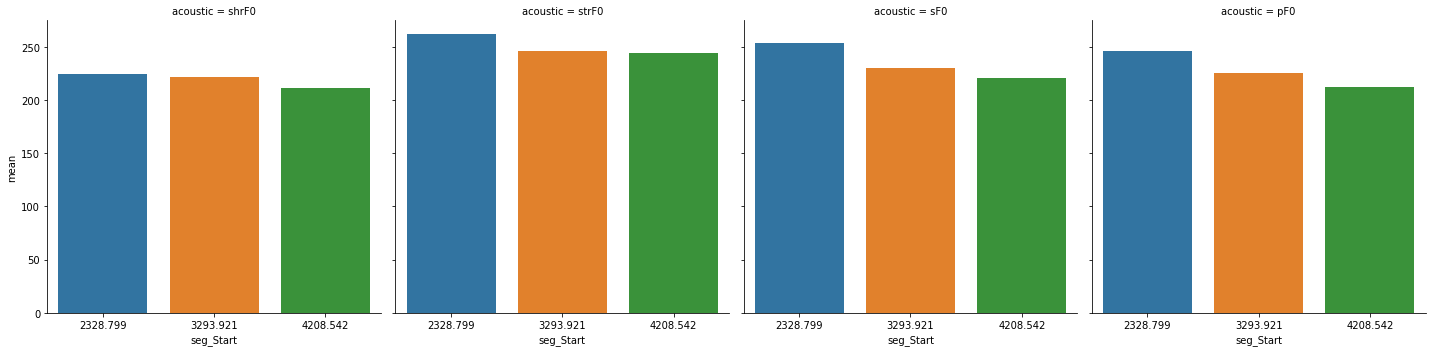

In [44]:
plot_cat_plot(group1)

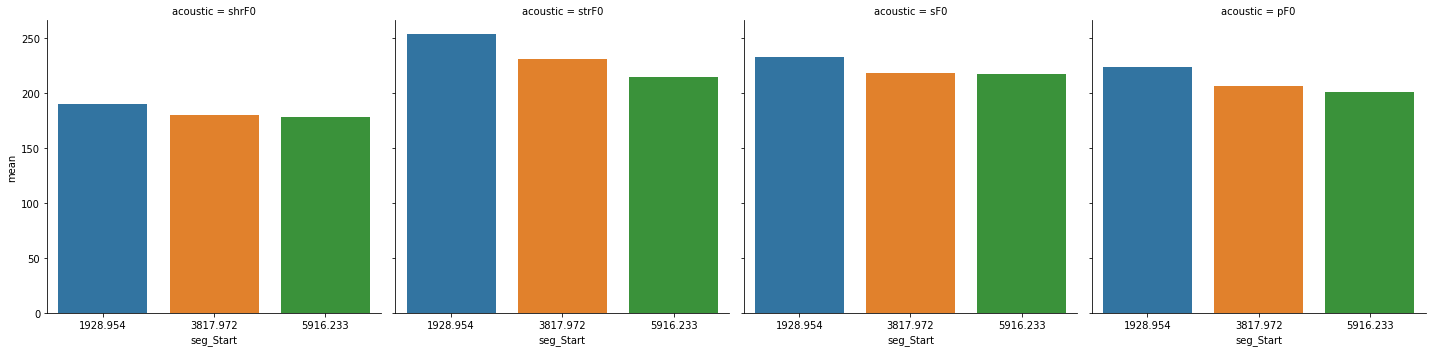

In [45]:
plot_cat_plot(group2)

There is quite a bit more variation in the mean than I thought there would be. 

Another visualization that would be useful is how the fundamental frequencies change over the intervals. The reshape_plot function defined in the cleaning section becomes useful. The function takes in a dataframe, filename, and start segment to uniquely identify one segment. I'm plotting the 3 segments at the top of the data. It's interesting to see the change in the frequency over time for each spoken 'sure'. They all taper down over time, while some see a significant rise toward the end

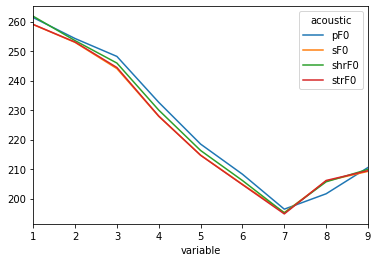

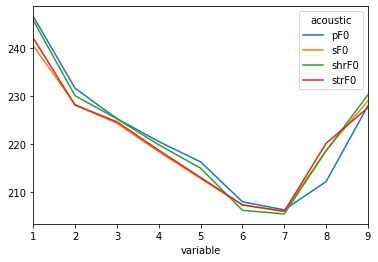

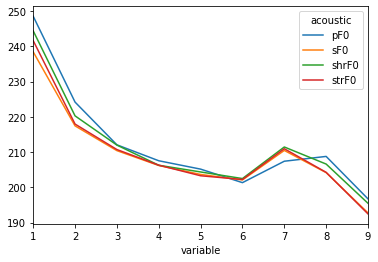

In [46]:
filename = 'F19May20_sure_normal.mat'
start1 = 2328.799
start2 = 3293.921
start3 = 4208.542

plot_df1 = reshape_plot(reshaped_df, filename, start1)
plot_df1.plot()

plot_df2 = reshape_plot(reshaped_df, filename, start2)
plot_df2.plot()

plot_df3 = reshape_plot(reshaped_df, filename, start3)
plot_df3.plot()

## Simple Test
I am going to conduct a T test to compare the difference in the fundamental frequency between men and women speaking the english word 'sure'. I'm going to guess that the differences in the frequencies will be stasticially significant (given the nature of the difference in pitch) - I'm interested to see by how much. We'll first need to get the overall means for the men and women for every sample

In [47]:
english = reshaped_df[reshaped_df['Language'] == 'English']
english

,Filename,0=do not use,Label,Language,Dialect/Village,Sex,Speaker #,Speaker,Lang_Spk,Phonation,...,1,2,3,4,5,6,7,8,9,mean
0,F19May20_sure_normal.mat,0 end,r,English,NaN,F,19,F19,English_F19,M,...,261.805,253.54,245.933,229.985,216.3,206.111,195.15,205.68,209.894,224.944
1,F19May20_sure_normal.mat,0 end,r,English,NaN,F,19,F19,English_F19,M,...,245.889,230.159,225.345,219.922,215.054,206.275,205.521,218.666,230.357,221.957
2,F19May20_sure_normal.mat,0,r,English,NaN,F,19,F19,English_F19,M,...,244.402,220.292,212.002,206.283,204.379,202.506,211.463,206.619,195.49,211.507
3,F1July22_sure_normal.mat,0 end,r,English,NaN,F,1,F1,English_F1,M,...,338.72,344.274,344.57,319.262,262.049,201.77,167.701,167.822,164.359,256.685
4,F1July22_sure_normal.mat,0 end,r,English,NaN,F,1,F1,English_F1,M,...,330.564,347.955,358.345,342.45,294.441,212.475,168.601,166.258,167.45,265.479
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50561,MPJuly8_sure_normal.mat,0,r,English,NaN,M,P,MP,English_MP,M,...,120.839,108.849,102.729,97.462,53.946,44.733,45.104,45.495,45.495,101.041
50562,MPJuly8_sure_normal.mat,NaN,r,English,NaN,M,P,MP,English_MP,M,...,131.166,109.398,103.423,97.394,93.955,55.659,46.47,46.391,47.26,111.123
50563,MSAugust27_sure_normal.mat,NaN,r,English,NaN,M,S,MS,English_MS,M,...,142.939,140.785,133.914,125.511,115.17,104.163,97.577,94.834,90.198,131.21
50564,MSAugust27_sure_normal.mat,NaN,r,English,NaN,M,S,MS,English_MS,M,...,147.698,133.693,126.735,122.882,118.568,112.932,106.285,99.633,94.714,125.051


In [48]:
men = english[english['Sex'] == 'M']
men

,Filename,0=do not use,Label,Language,Dialect/Village,Sex,Speaker #,Speaker,Lang_Spk,Phonation,...,1,2,3,4,5,6,7,8,9,mean
36,M1July22_sure_normal.mat,NaN,r,English,NaN,M,1,M1,English_M1,M,...,156.106,142.026,130.413,115.42,106.626,101.695,98.212,96.994,93.289,115.61
37,M20May20_sure_normal.mat,0,r,English,NaN,M,20,M20,English_M20,M,...,160.48,148.568,138.222,127.95,114.082,103.438,95.387,91.457,154.822,126.34
38,M20May20_sure_normal.mat,0,r,English,NaN,M,20,M20,English_M20,M,...,155.169,139.849,130.092,118.92,106.36,97.994,95.655,117.689,150.545,123.29
39,M20May20_sure_normal.mat,0,r,English,NaN,M,20,M20,English_M20,M,...,152.944,139.727,131.107,119.451,109.53,100.565,94.076,125.804,150.411,124.817
40,M21April24_sure_normal.mat,0,r,English,NaN,M,21,M21,English_M21,M,...,144.909,135.768,155.285,174.684,113.835,145.187,121.637,93.491,96.028,130.518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50561,MPJuly8_sure_normal.mat,0,r,English,NaN,M,P,MP,English_MP,M,...,120.839,108.849,102.729,97.462,53.946,44.733,45.104,45.495,45.495,101.041
50562,MPJuly8_sure_normal.mat,NaN,r,English,NaN,M,P,MP,English_MP,M,...,131.166,109.398,103.423,97.394,93.955,55.659,46.47,46.391,47.26,111.123
50563,MSAugust27_sure_normal.mat,NaN,r,English,NaN,M,S,MS,English_MS,M,...,142.939,140.785,133.914,125.511,115.17,104.163,97.577,94.834,90.198,131.21
50564,MSAugust27_sure_normal.mat,NaN,r,English,NaN,M,S,MS,English_MS,M,...,147.698,133.693,126.735,122.882,118.568,112.932,106.285,99.633,94.714,125.051


In [49]:
women = english[english['Sex'] == 'F']
women

,Filename,0=do not use,Label,Language,Dialect/Village,Sex,Speaker #,Speaker,Lang_Spk,Phonation,...,1,2,3,4,5,6,7,8,9,mean
0,F19May20_sure_normal.mat,0 end,r,English,NaN,F,19,F19,English_F19,M,...,261.805,253.54,245.933,229.985,216.3,206.111,195.15,205.68,209.894,224.944
1,F19May20_sure_normal.mat,0 end,r,English,NaN,F,19,F19,English_F19,M,...,245.889,230.159,225.345,219.922,215.054,206.275,205.521,218.666,230.357,221.957
2,F19May20_sure_normal.mat,0,r,English,NaN,F,19,F19,English_F19,M,...,244.402,220.292,212.002,206.283,204.379,202.506,211.463,206.619,195.49,211.507
3,F1July22_sure_normal.mat,0 end,r,English,NaN,F,1,F1,English_F1,M,...,338.72,344.274,344.57,319.262,262.049,201.77,167.701,167.822,164.359,256.685
4,F1July22_sure_normal.mat,0 end,r,English,NaN,F,1,F1,English_F1,M,...,330.564,347.955,358.345,342.45,294.441,212.475,168.601,166.258,167.45,265.479
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50530,FKApril15_sure_normal.mat,NaN,r,English,NaN,F,K,FK,English_FK,M,...,237.966,233.109,229.298,212.496,188.171,172.145,169.897,174.099,173.233,227.318
50531,FKApril15_sure_normal.mat,NaN,r,English,NaN,F,K,FK,English_FK,M,...,244.916,229.04,223.536,215.127,200.37,182.372,171.894,169.381,166.518,222.631
50532,FVMay6_sure_normal.mat,NaN,r,English,NaN,F,V,FV,English_FV,M,...,372.502,385.927,370.918,352.739,329.068,283.39,218.571,203.699,168.237,368.433
50533,FVMay6_sure_normal.mat,NaN,r,English,NaN,F,V,FV,English_FV,M,...,388.505,378.674,367.226,350.413,317.843,271.282,227.168,187.296,172.497,366.132


I can simply take the mean column of each sample, and pass it into the t test provided by scipy

In [50]:
from scipy import stats
men_mean = men['mean']
print(len(men_mean))
women_mean = women['mean']
print(len(women_mean))
stats.ttest_ind(men_mean, women_mean)

124
144


Ttest_indResult(statistic=-19.442355458087356, pvalue=5.378065192060549e-53)

## Test
As the results indicate, there are a plethora of issues conducting this type of test on the data. The T test assumes that the variation between the two samples is the same, and is also supposed to work better under samples that are less than 30. Both of these assumptions are wrong, so that would imply why the results are so skewed. The reason I'm conducting this test is because it's late and I simply don't know what else to do. I really don't have that much experience with inferential statistics, so it's hard for me to come up with a test on the fly. I spent so much time working on the reshaping and visualization that I don't have any juice left for the specific test. Hoping to get some feedback on what might be a good way to approach a test for a dataset like this

# Write up
In general, I think that I learned a lot during this project, but I am not happy at all with how the results turned out. I probably spent up to 15 hours on this assignment, and a good deal of that was spent trying to figure out how to work with pandas to reshape the data. The fact that the dataset was so large didn't help either. I also had a difficult time actually finding a dataset, so it was hard to know what question to ask to begin with. I'm glad that I got the experience really diving into pandas, but other than that almost nothing went well with the assignment

## Question
I didn't have a very specific question coming into this dataset, mostly becuase when I first saw it I didn't understand what most of it meant. It seemed interesting to me from a cleaning perspective, and so I wanted to see if I could tackle it. As I learned more about the dataset and the information it was encoding, I started to realize that there is the potential to look at a lot of interesting information and the relationships between vowels, words, languages, and the actual physical process of sound they create. If I had had more time, I would have loved to explore some of those relationships a bit more. In general, I mostly just wanted to see the graphs that showed the changes in the fundamental frequency over time

## Visualization
The visualization was the funnest part of this assignment to me. As I just mentioned, I really wanted to see how the acoustic values changed over the sample (and between different samples) for a spoken word. It was cool to see the difference in the path that the frequencies took between different samples. I'm sure (no pun intended) that the actual words spoken in the audio files sound almost identical, so it was cool to see what the information looks like on a mathematical level. 

## Cleaning
I focused soley on reshaping the data rather than cleaning it, mostly because I ran out of time. Because the data was so wide and had so many columns, I think my time was better spent in dealing with the reshaping. However, as was shown throughout my analysis, there was a lot of missing data that I didn't even realize was there until hours into working with the dataset. The data documentation itself even has information about where the missing data might be. I think it may have been proper to do at least some attempt at data cleaning at the beginning just so I could know what I was dealing with, but the dataset and its reshaping turned out to be quite a difficult task in and of itself. 